# Code

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

def plot_in_range(image, scale=False):
    if scale:
        minValue = np.amin(image)
        maxValue = np.amax(image)
        plt.imshow((image-minValue)/(maxValue-minValue))
    else:
        plt.imshow(image)
    plt.show()

### Here are two images to test the image processing algorithm

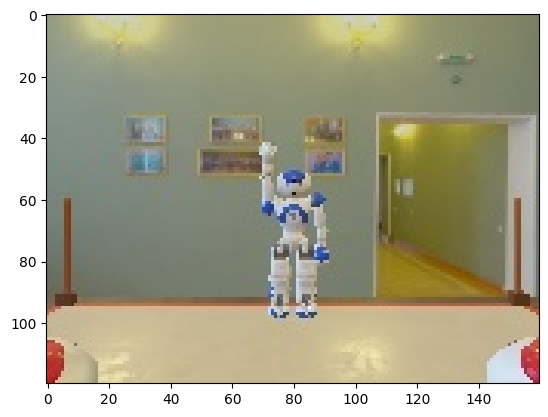

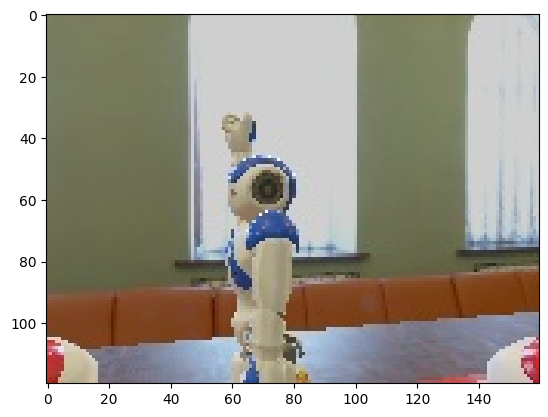

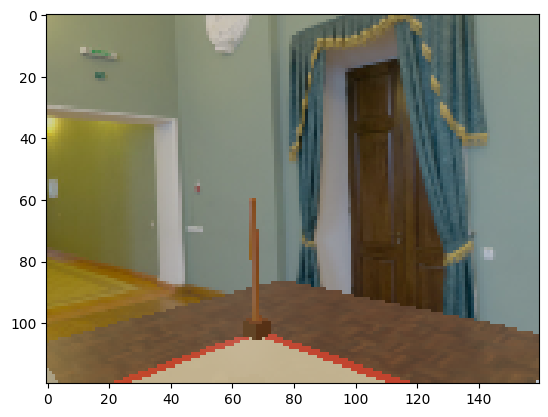

In [19]:
im1 = np.asarray(PIL.Image.open("camera.jpg"))
im2 = np.asarray(PIL.Image.open("window_back.jpg"))
im3 = np.asarray(PIL.Image.open("curtains.png"))
im4 = np.asarray(PIL.Image.open("curtains_with_robot.png"))
plot_in_range(im1)
plot_in_range(im2)
plot_in_range(im3)
plot_in_range(im4)

In [ ]:
blue_color = [49, 91, 218]
red_color = [198, 44, 49]

#### First, we use the Laplacian operator to detect sharp color changes

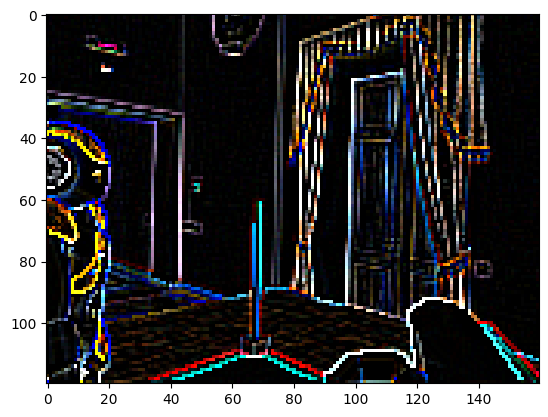

In [20]:
img = im4.copy()
laplacian = cv2.Laplacian(img, cv2.CV_8U, ksize=3)
plot_in_range(laplacian)

#### The high values are then smoothed out using a Gaussian blur to get blurry blobs

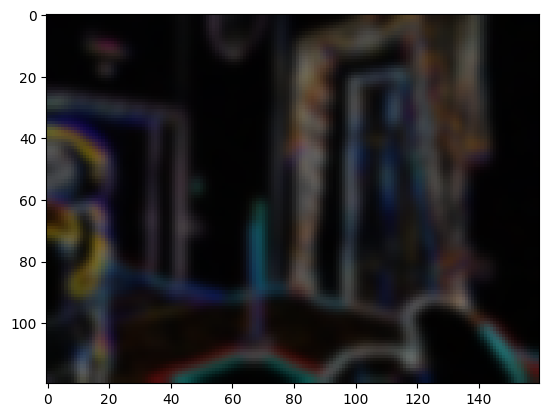

In [21]:
blur = cv2.GaussianBlur(laplacian, (0, 0), 2)
plot_in_range(blur)

#### We then convert the image to grayscale and threshold it to get a binary image

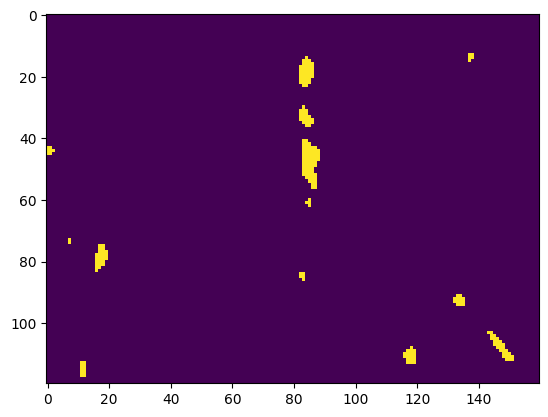

In [22]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
plot_in_range(thresh)

#### We then use the closing operator to clump together small groups of blobs

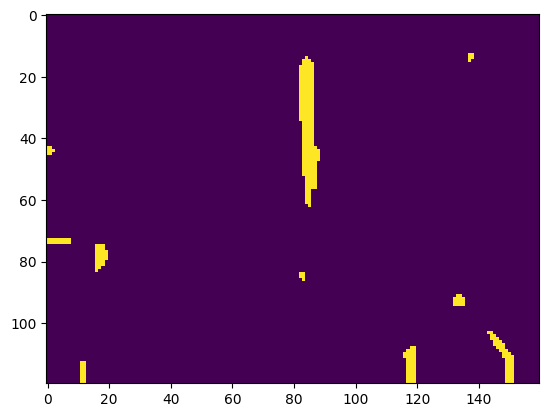

In [23]:
closing = cv2.morphologyEx(
            thresh, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15)))
plot_in_range(closing)

#### We finally find the largest contour in the image, which should be the opponent

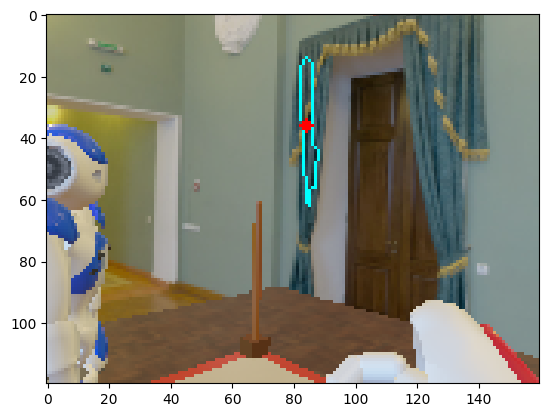

In [24]:
contours, hierarchy = cv2.findContours(
    closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]
M = cv2.moments(largest_contour)
horizontal_center = int(M['m10']/M['m00'])
vertical_center = int(M['m01']/M['m00'])

# draw largest contour on original image
mask = img.copy()
cv2.drawContours(mask, [largest_contour], 0, (0, 255, 255), 1)
mask = cv2.circle(mask, (horizontal_center, vertical_center), radius=2, color=(255, 0, 0), thickness=-1)
plot_in_range(mask)
